In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import re
import time
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn import metrics

In [42]:
pd.set_option('precision', 2)
# pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)

In [676]:
recipeDataUrl = 'RAW_recipes.csv'
rawData = pd.read_csv(recipeDataUrl,low_memory=False)
recipeColumns = rawData.columns
print(recipeColumns)
print("Number of columns: ",len(recipeColumns))
rawData.head()

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')
Number of columns:  12


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [675]:
rawData.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,id_copy
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,137739


In [647]:
rawData = rawData.astype({'id': 'object','contributor_id': 'object'})
rawData['id_copy'] = rawData['id']
rawData1 = rawData.set_index('id')

In [648]:
rawData.describe()

,minutes,n_steps,n_ingredients
count,2.32e+05,231637.00,231637.00
mean,9.40e+03,9.77,9.05
std,4.46e+06,6.00,3.73
min,0.00e+00,0.00,1.00
25%,2.00e+01,6.00,6.00
50%,4.00e+01,9.00,9.00
75%,6.50e+01,12.00,11.00
max,2.15e+09,145.00,43.00


In [649]:
print("Number of total recipes: ",rawData["id"].count())

Number of total recipes:  231637


In [650]:
print("Number of contributors: ",rawData["contributor_id"].nunique())

Number of contributors:  27926


### Adding Review data

In [677]:
reviewDataUrl = 'RAW_interactions.csv'
reviewData = pd.read_csv(reviewDataUrl,low_memory=False)
reviewColumns = reviewData.columns
print(reviewColumns)
print("Number of columns: ",len(reviewColumns))
reviewData.head()

Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')
Number of columns:  5


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [635]:
print("Total number of reviews: ",reviewData["recipe_id"].count())

Total number of reviews:  1132367


In [679]:
print("Total number of contributors: ",reviewData["user_id"].nunique())

Total number of contributors:  226570


In [552]:
rating = reviewData[['recipe_id','rating']].groupby('recipe_id',as_index=False)['rating']\
                    .agg(['mean','count'])\
                    .rename(columns={"mean": "mean_rating", "count": "review_count"})
rating.head()

,mean_rating,review_count
recipe_id,,
38,4.25,4
39,3.00,1
40,4.33,9
41,4.50,2
43,1.00,1


In [652]:
rawData2 = rawData1.join(rating)
print(rawData2.columns)
rawData2.head(5)

Index(['name', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition',
       'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients',
       'id_copy', 'mean_rating', 'review_count'],
      dtype='object')


,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,id_copy,mean_rating,review_count
id,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,137739,5.0,3
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,31490,3.5,4
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,112140,4.0,1
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,59389,4.5,2
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,44061,5.0,1


### Converting ingredients to usable string

In [558]:
def get_list(x):
    strlistF = []
    strlist = eval(x)
    for item in strlist:
        if len(item) > 2 and not re.search("[^a-zA-Z\s]",item):
            temp1 = item.strip()
            temp2 = temp1.replace(" ","_")
            strlistF.append(temp2)

    return(" ".join(strlistF))


rawData2['ingr_str'] = rawData2['ingredients'].apply(get_list)
rawData2.dtypes

name               object
minutes             int64
contributor_id     object
submitted          object
tags               object
nutrition          object
n_steps             int64
steps              object
description        object
ingredients        object
n_ingredients       int64
id_copy            object
mean_rating       float64
review_count        int64
ingr_str           object
dtype: object

### Flattening the nutritional values to columns

In [562]:
allNutriList=['cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']

recpNutr = pd.DataFrame(rawData1['nutrition'].apply(eval).to_list(),\
                        index=rawData1.index\
                        ,columns=allNutriList)

rawData3 = rawData2.join(recpNutr)
RAW_recipes = rawData3.copy()
print(RAW_recipes.columns)
RAW_recipes.head(5)

Index(['name', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition',
       'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients',
       'id_copy', 'mean_rating', 'review_count', 'ingr_str', 'cal', 'totalFat',
       'sugar', 'sodium', 'protein', 'satFat', 'carbs'],
      dtype='object')


,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,...,mean_rating,review_count,ingr_str,cal,totalFat,sugar,sodium,protein,satFat,carbs
id,,,,,,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,5.0,3,winter_squash mexican_seasoning mixed_spice ho...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",...,3.5,4,prepared_pizza_crust sausage_patty eggs milk s...,173.4,18.0,0.0,17.0,22.0,35.0,1.0
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",...,4.0,1,ground_beef yellow_onions diced_tomatoes tomat...,269.8,22.0,32.0,48.0,39.0,27.0,5.0
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",...,4.5,2,spreadable_cheese_with_garlic_and_herbs new_po...,368.1,17.0,10.0,2.0,14.0,8.0,20.0
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,5.0,1,tomato_juice apple_cider_vinegar sugar salt pe...,352.9,1.0,337.0,23.0,3.0,0.0,28.0


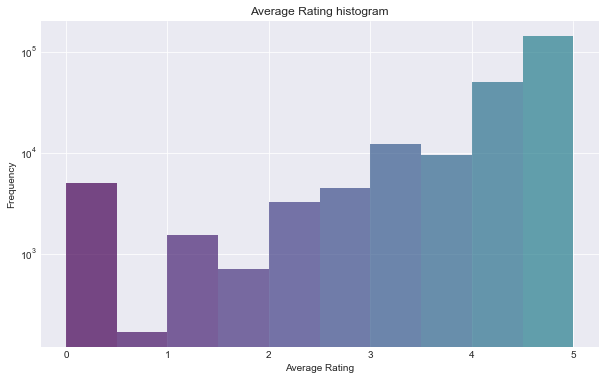

In [615]:
fig8,ax = plt.subplots(1,figsize=(10,6))
plt.style.use('seaborn-darkgrid')
cmap_list = plt.get_cmap('viridis').colors

n, bins, patches = ax.hist(rawData3['mean_rating'],alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=12

ax.set(xlabel='Average Rating', ylabel='Frequency', title="Average Rating histogram", yscale="log")
plt.savefig('Rating histogram.png', bbox_inches='tight')
plt.show()

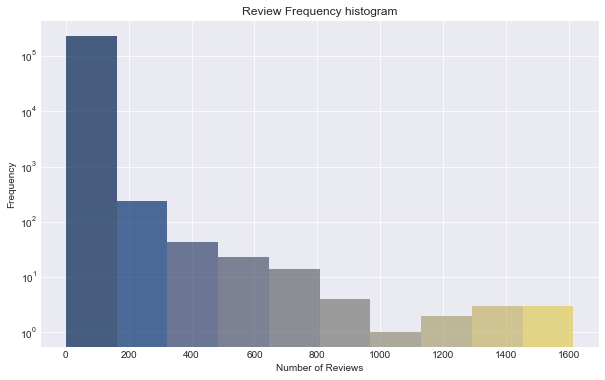

In [614]:
fig8,ax = plt.subplots(1,figsize=(10,6))
plt.style.use('seaborn-deep')
cmap_list = plt.get_cmap('cividis').colors

n, bins, patches = ax.hist(rawData3['review_count'],alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=25

ax.set(xlabel='Number of Reviews', ylabel='Frequency', title="Review Frequency histogram", yscale="log")
plt.savefig('Review histogram.png', bbox_inches='tight')
plt.show()

In [594]:
rawData3.sort_values("review_count",ascending=False).head(1)

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,...,mean_rating,review_count,ingr_str,cal,totalFat,sugar,sodium,protein,satFat,carbs
id,,,,,,,,,,,,,,,,,,,,,
2886,best banana bread,65,1762,1999-09-26,"['time-to-make', 'course', 'main-ingredient', ...","[272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]",13,"['remove odd pots and pans from oven', 'prehea...",you'll never need another banana bread recipe ...,"['butter', 'granulated sugar', 'eggs', 'banana...",...,4.19,1613,butter granulated_sugar eggs bananas baking_so...,272.8,16.0,97.0,14.0,7.0,31.0,14.0


In [619]:
numeric_cols = ['minutes', 'n_steps', 'n_ingredients', 'cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']

In [620]:
rawData3 = rawData3.reset_index()

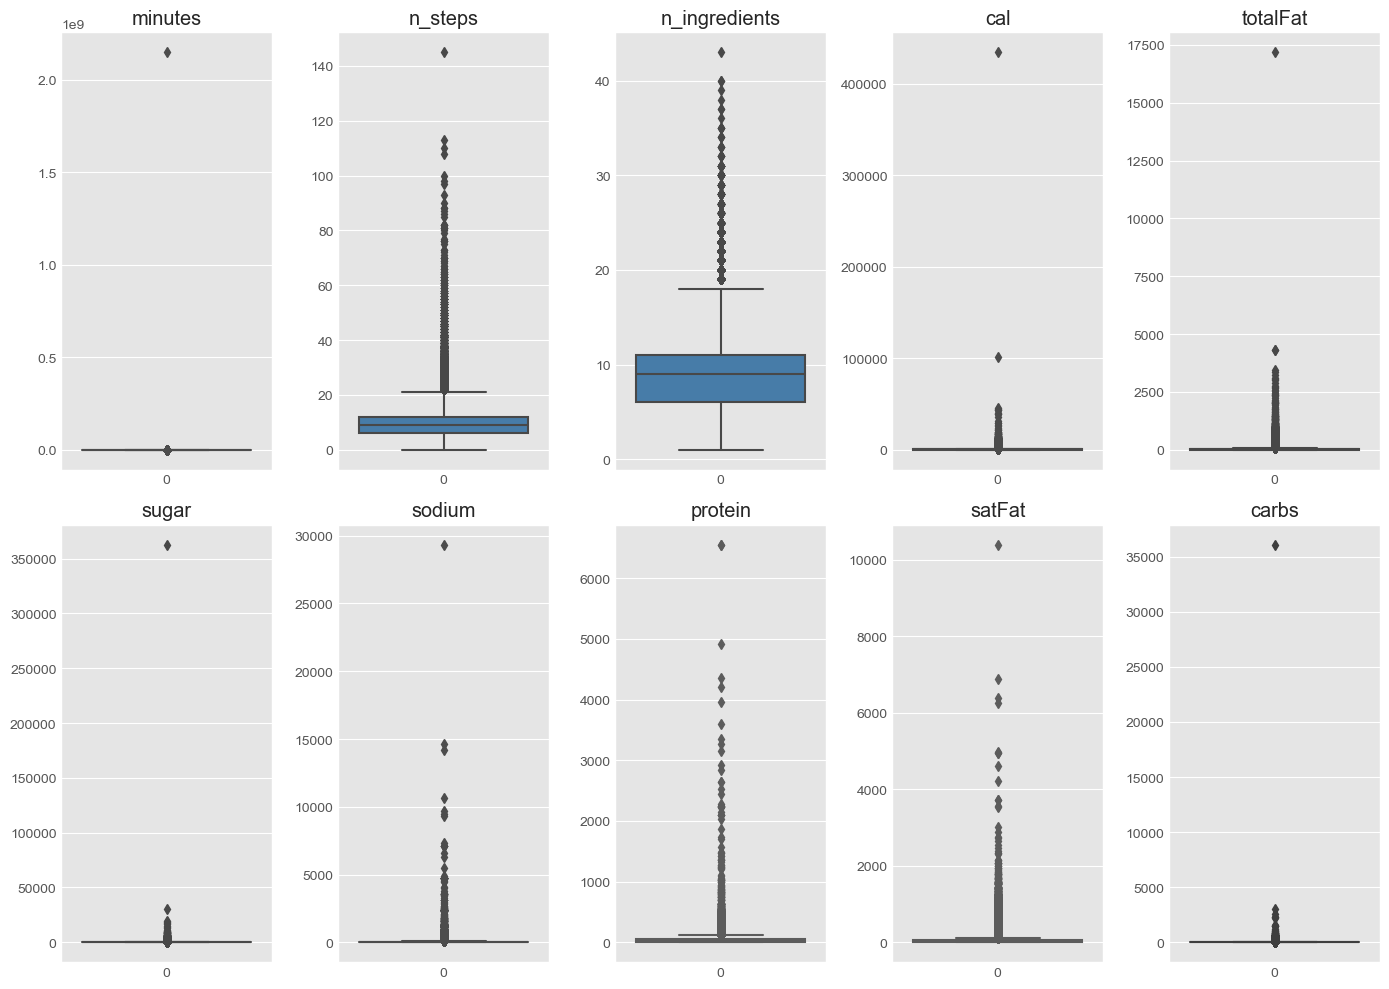

In [681]:
plt.style.use('ggplot')
fig, axis = plt.subplots(2,5,figsize=(14,10))
axis = axis.ravel()
colors = plt.get_cmap('Set1',15).colors
for i,ax in enumerate(axis):
    sns.boxplot(data=rawData3[numeric_cols[i]],color=colors[i+1],ax=ax)
    ax.set(title=numeric_cols[i])
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

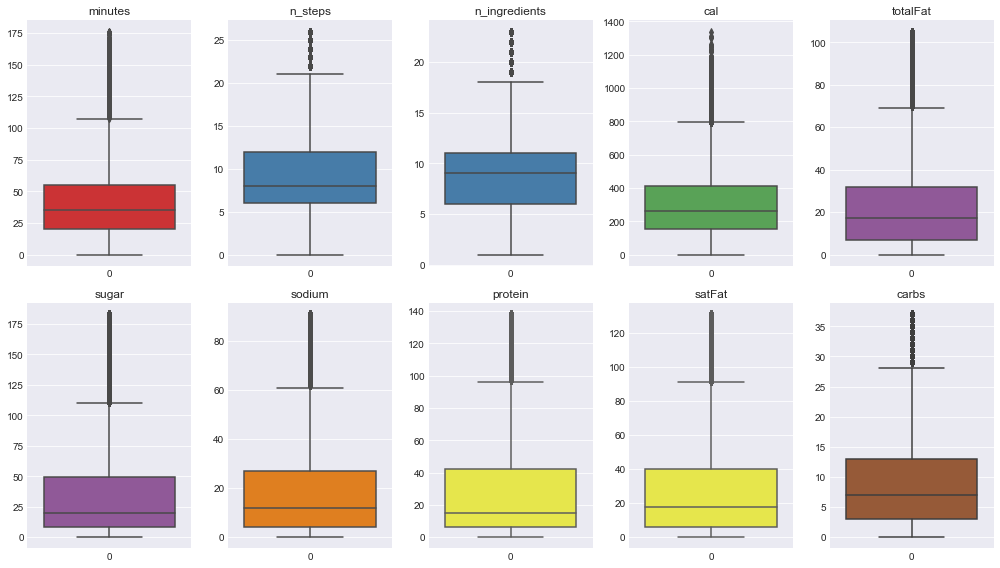

In [541]:
Raw1 = RAW_recipes.reset_index()
fig, axis = plt.subplots(2,5,figsize=(14,8))
axis = axis.ravel()
colors = plt.get_cmap('Set1',15).colors
for i,ax in enumerate(axis):
    sns.boxplot(data=Raw1[numeric_cols[i]],color=colors[i+1],ax=ax)
    ax.set(title=numeric_cols[i])
plt.tight_layout()

In [555]:
RAW_recipes.describe()

,minutes,n_steps,n_ingredients,mean_rating,review_count,cal,totalFat,sugar,sodium,protein,satFat,carbs
count,2.32e+05,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00
mean,9.40e+03,9.77,9.05,4.35,4.89,473.94,36.08,84.30,30.15,34.68,45.59,15.56
std,4.46e+06,6.00,3.73,0.99,17.53,1189.71,77.80,800.08,131.96,58.47,98.24,81.82
min,0.00e+00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00e+01,6.00,6.00,4.00,1.00,174.40,8.00,9.00,5.00,7.00,7.00,4.00
50%,4.00e+01,9.00,9.00,4.71,2.00,313.40,20.00,25.00,14.00,18.00,23.00,9.00
75%,6.50e+01,12.00,11.00,5.00,4.00,519.70,41.00,68.00,33.00,51.00,52.00,16.00
max,2.15e+09,145.00,43.00,5.00,1613.00,434360.20,17183.00,362729.00,29338.00,6552.00,10395.00,36098.00


---
### Performing clamping technique to remove outliers

In [563]:
# Removing values according to IQR
Col_to_clamp=['n_steps','minutes','n_ingredients','cal', 'totalFat', 'sugar',   'sodium', 'protein', 'satFat', 'carbs']
for col in Col_to_clamp:
    IQR = RAW_recipes[col].quantile(0.75) - RAW_recipes[col].quantile(0.25)
    colmax = RAW_recipes[col].quantile(0.75) + 2.5 * IQR
    colmin = RAW_recipes[col].quantile(0.25) - 2.5 * IQR
    RAW_recipes = RAW_recipes[ (RAW_recipes[col] < colmax) & (RAW_recipes[col] > colmin) ]
# RAW_recipes=RAW_recipes.reset_index(drop=True)

In [564]:
RAW_recipes.describe()

,minutes,n_steps,n_ingredients,mean_rating,review_count,cal,totalFat,sugar,sodium,protein,satFat,carbs
count,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00,177201.00
mean,40.92,9.17,8.88,4.37,4.86,298.81,22.17,35.91,18.01,26.42,27.30,8.96
std,30.37,4.83,3.52,0.96,16.90,190.97,19.46,39.98,18.25,27.35,27.49,7.24
min,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,6.00,6.00,4.00,1.00,151.90,7.00,8.00,4.00,6.00,6.00,3.00
50%,35.00,8.00,9.00,4.71,2.00,264.30,17.00,20.00,12.00,15.00,18.00,7.00
75%,55.00,12.00,11.00,5.00,4.00,409.90,32.00,49.00,27.00,42.00,40.00,13.00
max,176.00,26.00,23.00,5.00,1613.00,1338.20,105.00,183.00,91.00,138.00,131.00,37.00


In [706]:
RAW_recipes.count()

name              177201
minutes           177201
contributor_id    177201
submitted         177201
tags              177201
nutrition         177201
n_steps           177201
steps             177201
description       173595
ingredients       177201
n_ingredients     177201
id_copy           177201
mean_rating       177201
review_count      177201
ingr_str          177201
cal               177201
totalFat          177201
sugar             177201
sodium            177201
protein           177201
satFat            177201
carbs             177201
dtype: int64

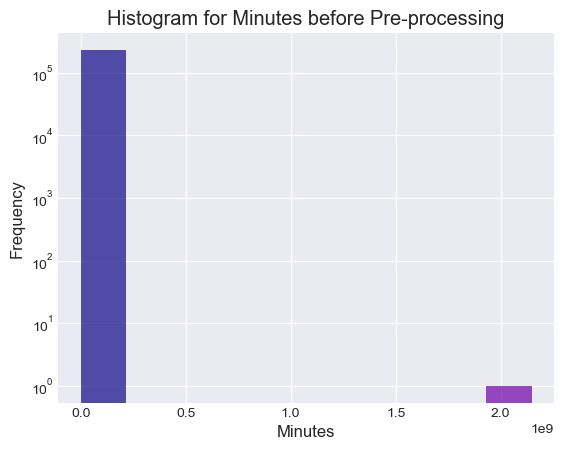

In [637]:
fig8,ax = plt.subplots(1)
plt.style.use('seaborn-deep')
cmap_list = plt.get_cmap('plasma').colors

n, bins, patches = ax.hist(rawData['minutes'],alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=6

ax.set(xlabel='Minutes', ylabel='Frequency',title="Histogram for Minutes before Pre-processing",yscale="log")
plt.savefig('minutes_before.png', bbox_inches='tight')
plt.show()

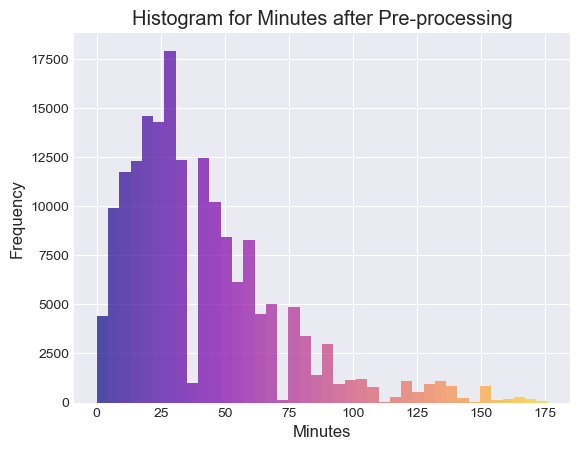

In [638]:
fig8,ax = plt.subplots(1)
plt.style.use('seaborn-darkgrid')
cmap_list = plt.get_cmap('plasma').colors

n, bins, patches = ax.hist(RAW_recipes['minutes'],bins=40,alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=6

ax.set(xlabel='Minutes', ylabel='Frequency',title="Histogram for Minutes after Pre-processing")
plt.savefig('minutes_after.png', bbox_inches='tight')
plt.show()

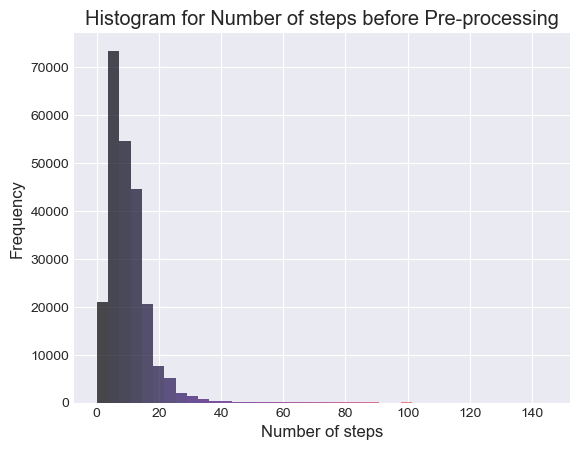

In [646]:
fig8,ax = plt.subplots(1)
plt.style.use('seaborn-darkgrid')
cmap_list = plt.get_cmap('magma').colors

n, bins, patches = ax.hist(rawData['n_steps'],bins=40,alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=6

ax.set(xlabel='Number of steps', ylabel='Frequency',title="Histogram for Number of steps before Pre-processing")
plt.savefig('steps_before.png', bbox_inches='tight')
plt.show()

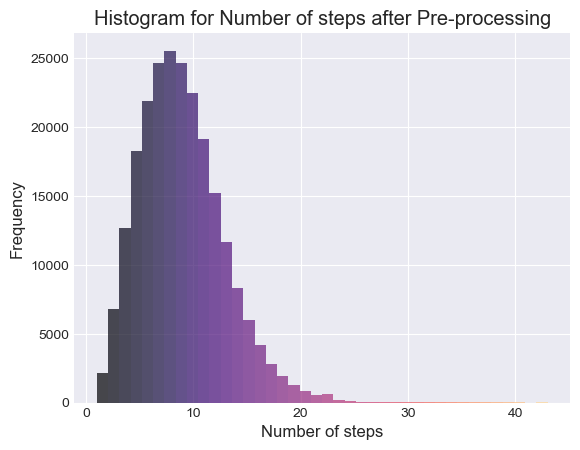

In [645]:
fig8,ax = plt.subplots(1)
plt.style.use('seaborn-darkgrid')
cmap_list = plt.get_cmap('magma').colors

n, bins, patches = ax.hist(rawData['n_ingredients'],bins=40,alpha=0.7)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=6

ax.set(xlabel='Number of steps', ylabel='Frequency',title="Histogram for Number of steps after Pre-processing")
plt.savefig('steps_after.png', bbox_inches='tight')
plt.show()

rawData.sort_values(by='minutes', ascending=False).head(5)

rawData = rawData[rawData['minutes']<=1051200]

rawData = rawData[ (rawData['n_steps'] < 100) & (rawData['n_steps'] > 5) \
                  & (rawData['minutes'] > 5) & (rawData['minutes'] < 2880) \
                  & (rawData['n_ingredients'] >= 1 )]

In [565]:
print("Checking if Null values exist:")
print(RAW_recipes.isnull().any())

Checking if Null values exist:
name              False
minutes           False
contributor_id    False
submitted         False
tags              False
nutrition         False
n_steps           False
steps             False
description        True
ingredients       False
n_ingredients     False
id_copy           False
mean_rating       False
review_count      False
ingr_str          False
cal               False
totalFat          False
sugar             False
sodium            False
protein           False
satFat            False
carbs             False
dtype: bool


In [566]:
recpData2 = RAW_recipes.copy()

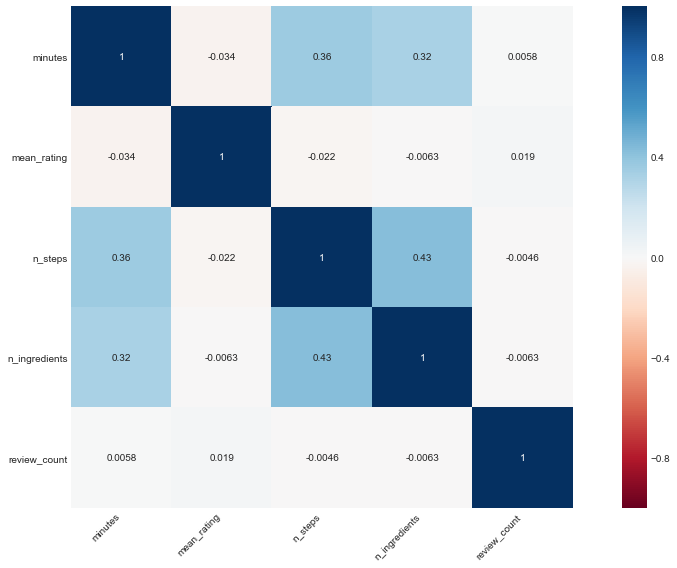

In [579]:
fig,ax = plt.subplots(1,figsize=(14,8))
sns.heatmap(recpData2[["minutes","mean_rating","n_steps","n_ingredients","review_count"]].corr(), vmin=-1, vmax=1, center=0, annot=True, cmap=plt.get_cmap('RdBu'), square=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
plt.savefig('correlation_heat_map.png', bbox_inches='tight')
plt.tight_layout()

# Clusters by nutrition values

In [227]:
# scaled = StandardScaler().fit_transform(recpNutr)
scaled = Normalizer().fit_transform(recpData2[allNutriList])

pca = PCA()
principalComponents = pca.fit_transform(scaled)

In [228]:
scaled

array([[0.96616768, 0.        , 0.24388699, ..., 0.03752107, 0.        ,
        0.07504215],
       [0.9634737 , 0.10001457, 0.        , ..., 0.12224003, 0.19447278,
        0.00555637],
       [0.96064104, 0.07833248, 0.11393815, ..., 0.13886212, 0.09613532,
        0.01780284],
       ...,
       [0.98466654, 0.09979728, 0.03326576, ..., 0.09979728, 0.0831644 ,
        0.        ],
       [0.94705821, 0.05541298, 0.28713999, ..., 0.03526281, 0.10578842,
        0.04533789],
       [0.97674431, 0.07818422, 0.18429138, ..., 0.02233835, 0.06143046,
        0.03350752]])

The explained variance ratios are : [0.64729439 0.16230638 0.0998635  0.06000448 0.01652446 0.01197393
 0.00203287]


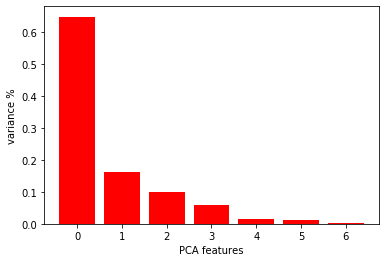

In [229]:
print("The explained variance ratios are :",pca.explained_variance_ratio_)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

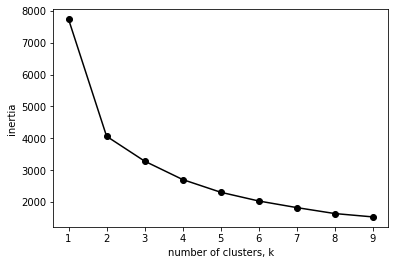

In [231]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

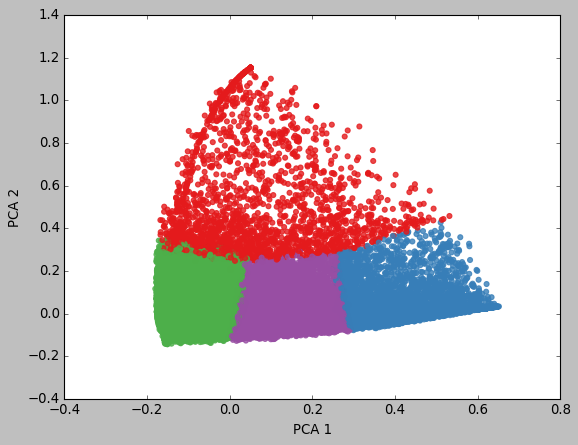

In [265]:
model = KMeans(n_clusters=4)
model.fit(scaled)
colors = plt.get_cmap('Set1',10).colors
with plt.style.context('classic'):
    plt.scatter(PCA_components[0], PCA_components[1], alpha=0.8, color=colors[model.labels_])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

In [262]:
labels = pd.DataFrame(model.labels_)
labels[0].value_counts()

0    129601
1     47600
Name: 0, dtype: int64

In [263]:
recpData2['nutr_cluster'] = model.labels_
# recpNutr['nutr_cluster'] = model.labels_

In [264]:
recpData2.groupby(['nutr_cluster']).mean().sort_values("mean_rating",ascending=False)

,minutes,n_steps,n_ingredients,cal,totalFat,sugar,sodium,protein,satFat,carbs,mean_rating,review_count,ingr_cluster
nutr_cluster,,,,,,,,,,,,,
0,41.89,9.35,9.15,331.44,25.85,19.92,21.75,33.31,31.09,8.64,4.37,4.81,1.50
1,38.30,8.70,8.13,209.96,12.13,79.45,7.83,7.67,16.97,9.82,4.35,4.98,1.26


# Clusters by ingredients

In [236]:
#Tokenizing by spliting by space
def spliter(in_string):
    tokens = in_string.split()
    return tokens

#Creating Vectorizer model, with taking top 500 words from the description
vectorize = TfidfVectorizer(max_features=500, tokenizer=spliter, stop_words='english')

ingr_matrix = vectorize.fit_transform(recpData2['ingr_str'])

#Converting the spared matrix to dense matrix and creating pandas DF from it
ingr_DF = pd.DataFrame(ingr_matrix.todense(),index=recpData2.index)
ingr_DF.columns=vectorize.get_feature_names()
ingr_DF.head(5)

,active_dry_yeast,allspice,almond_extract,almonds,american_cheese,apple,apple_cider,apple_cider_vinegar,apple_juice,apples,...,worcestershire_sauce,yeast,yellow_bell_pepper,yellow_cake_mix,yellow_cornmeal,yellow_onion,yellow_onions,yellow_squash,yogurt,zucchini
id,,,,,,,,,,,,,,,,,,,,,
137739,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
31490,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
112140,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.42,0.0,0.0,0.0
59389,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.52,0.0,0.0,0.0,0.00,0.0,0.0,0.0
5289,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0


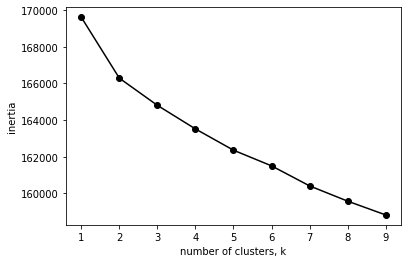

Process completed - 710.9190621376038 seconds elapsed.


In [249]:
start = time.time()
#Passing the vectorized matrix created above to k-Means model for clustering
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=0)
    
    # Fit model to samples
    model.fit(ingr_DF)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='#FC4E4E')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
end = time.time()
print("Process completed - %s seconds elapsed." % (end - start))

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(ks, inertias, '-o', color='#FC4E4E')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.savefig('inertia.png', bbox_inches='tight')
plt.show()

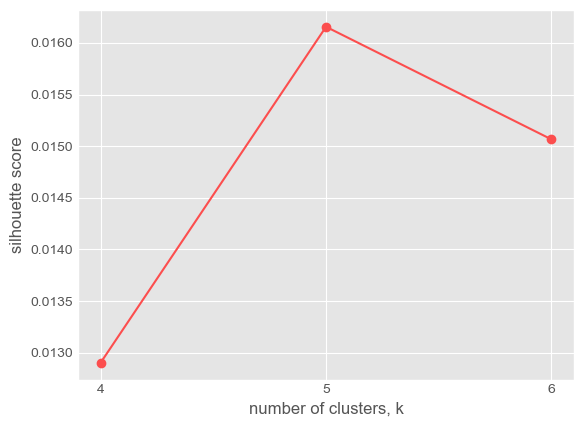

Process completed - 1976.5109519958496 seconds elapsed.


In [699]:
from sklearn.metrics import silhouette_score
start = time.time()
#Passing the vectorized matrix created above to k-Means model for clustering
ks = range(4, 7)
sil = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=0)
    
    # Fit model to samples
    model.fit(ingr_DF)
    labels = model.labels_
    sil.append(silhouette_score(ingr_DF, labels, metric = 'euclidean'))

plt.plot(ks, sil, '-o', color='#FC4E4E')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()
end = time.time()
print("Process completed - %s seconds elapsed." % (end - start))

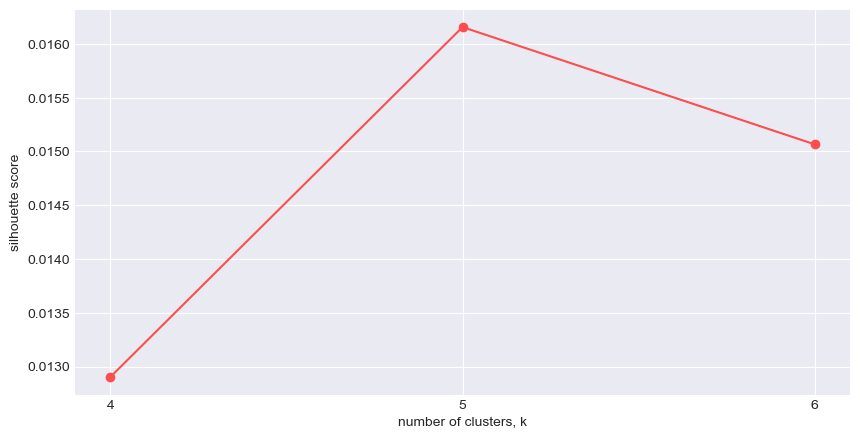

In [705]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.plot(ks, sil, '-o', color='#FC4E4E')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.savefig('silh.png', bbox_inches='tight')
plt.show()

In [694]:
model = KMeans(n_clusters=5, random_state=0)
model.fit(ingr_DF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [695]:
def top_words_in_cluster(num_of_words=15,for_clusters=[],KMeans_model=model,vectorize=vectorize):
    #getting the top 500 words which were used in vectorizer
    features = vectorize.get_feature_names()
    
    #If the cluster list is not given by user then giving output for all cluster
    if(len(for_clusters)==0):
        for_clusters = list(set(KMeans_model.labels_))
    
    #getting the centroid vectors (which will be having 500 dimentions) 
    #then taking the indices for sorted data, which will indicate which words are important for the cluster 
    centroids = KMeans_model.cluster_centers_.argsort()[:,::-1]
    
    #for getting the most important (frequent) words of the cluster 
    for this_label in for_clusters:
        print('Cluster '+str(this_label)+' -> ',end = '')
        for ind in centroids[this_label, :num_of_words]:
            print(features[ind]+' ', end='')
        print()

print('\nCrucial ingredients for each clusters: \n')
top_words_in_cluster(for_clusters=list(range(0, 5)))


Crucial ingredients for each clusters: 

Cluster 0 -> salt onion mayonnaise garlic_cloves pepper sugar extra_virgin_olive_oil vegetable_oil garlic tomatoes lemon_juice salt_and_pepper parmesan_cheese sour_cream black_pepper 
Cluster 1 -> water salt onion sugar butter pepper vegetable_oil oil cornstarch eggs flour garlic_cloves garlic soy_sauce lemon_juice 
Cluster 2 -> sugar baking_powder eggs baking_soda flour salt vanilla butter egg milk cinnamon vanilla_extract brown_sugar granulated_sugar unsalted_butter 
Cluster 3 -> butter milk salt eggs pepper onion flour parmesan_cheese cheddar_cheese salt_and_pepper egg sugar sour_cream brown_sugar potatoes 
Cluster 4 -> olive_oil garlic_cloves salt onion garlic salt_and_pepper parmesan_cheese pepper tomatoes garlic_clove black_pepper lemon_juice fresh_parsley balsamic_vinegar fresh_ground_black_pepper 


In [696]:
recpData2['ingr_cluster'] = model.labels_
# recpNutr['ingr_cluster'] = model.labels_

In [697]:
recpData2['ingr_cluster'].value_counts()

0    80109
3    28961
4    25476
2    23507
1    19148
Name: ingr_cluster, dtype: int64

In [698]:
ingr_results = recpData2.groupby(['ingr_cluster']).mean().sort_values("mean_rating",ascending=True)
ingr_results

,minutes,n_steps,n_ingredients,mean_rating,review_count,cal,totalFat,sugar,sodium,protein,satFat,carbs
ingr_cluster,,,,,,,,,,,,
2,46.13,10.82,9.87,4.22,5.95,252.26,17.05,67.15,9.57,9.07,24.30,10.79
1,48.56,9.86,9.52,4.27,5.12,293.16,19.39,37.32,20.33,27.42,22.60,9.76
3,43.41,9.69,8.31,4.38,5.17,338.14,27.95,31.41,19.62,27.99,45.23,9.23
0,36.01,8.07,8.16,4.40,4.44,284.89,20.77,32.69,18.77,28.03,23.74,8.04
4,43.01,10.04,10.38,4.43,4.61,345.05,26.78,21.26,19.87,34.83,24.40,9.22


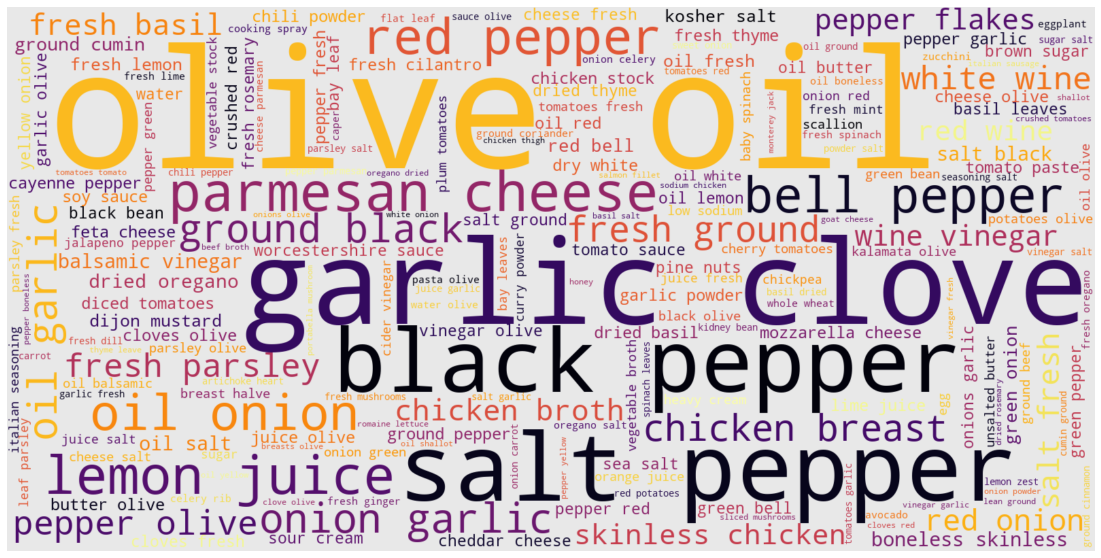

In [403]:
%matplotlib inline
from wordcloud import WordCloud

ser = pd.Series(recpData2[recpData2["ingr_cluster"]==4]["ingr_str"].apply(lambda x: x.replace("_"," ")))
textt=ser.str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, background_color="#E8E8E8",colormap="inferno_r").generate(textt)
plt.figure(figsize=(20,10))
# plt.savefig('topCluster.png', format='png')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('topcluster.png', facecolor='k', bbox_inches='tight')
plt.show()

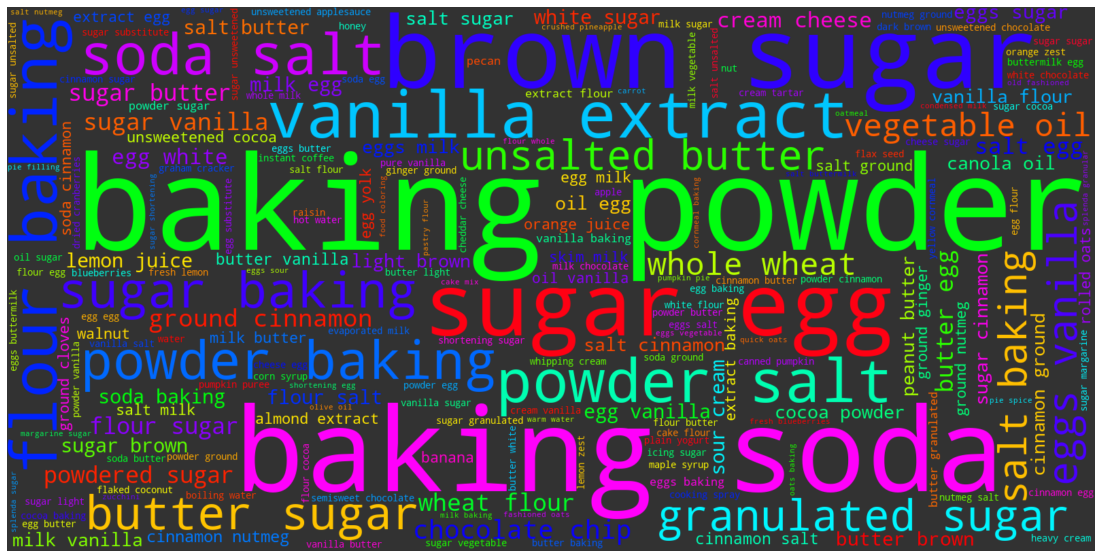

In [413]:
%matplotlib inline
from wordcloud import WordCloud

ser = pd.Series(recpData2[recpData2["ingr_cluster"]==2]["ingr_str"].apply(lambda x: x.replace("_"," ")))
textt=ser.str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, background_color="#323232",colormap="gist_rainbow").generate(textt)
plt.figure(figsize=(20,10))
# plt.savefig('topCluster.png', format='png')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('last.png', facecolor='k', bbox_inches='tight')
plt.show()

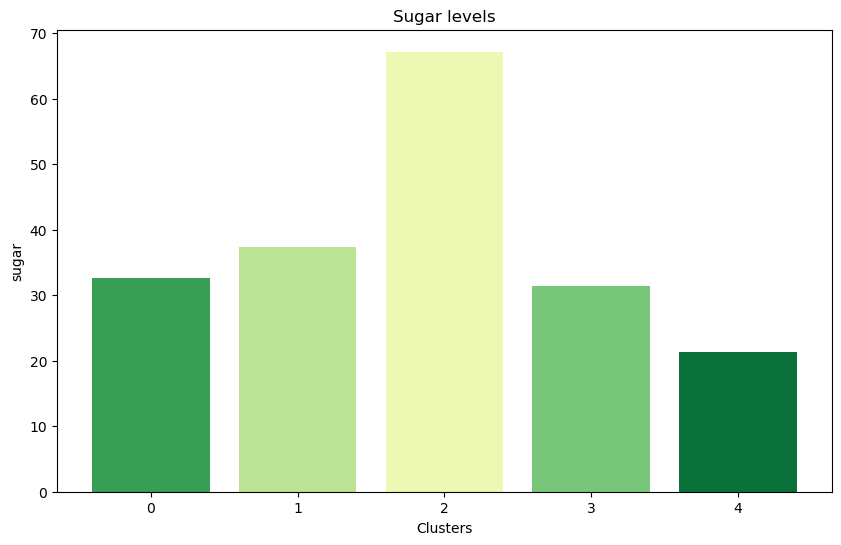

In [618]:
plt.style.use('default')
fig,ax = plt.subplots(1,figsize=(10,6))
ax.bar(ingr_results.index,ingr_results.sugar,color=sns.color_palette("YlGn",5))
ax.set(title="Sugar levels",xlabel="Clusters",ylabel="sugar")
plt.savefig('sugar.png', bbox_inches='tight')
plt.show()

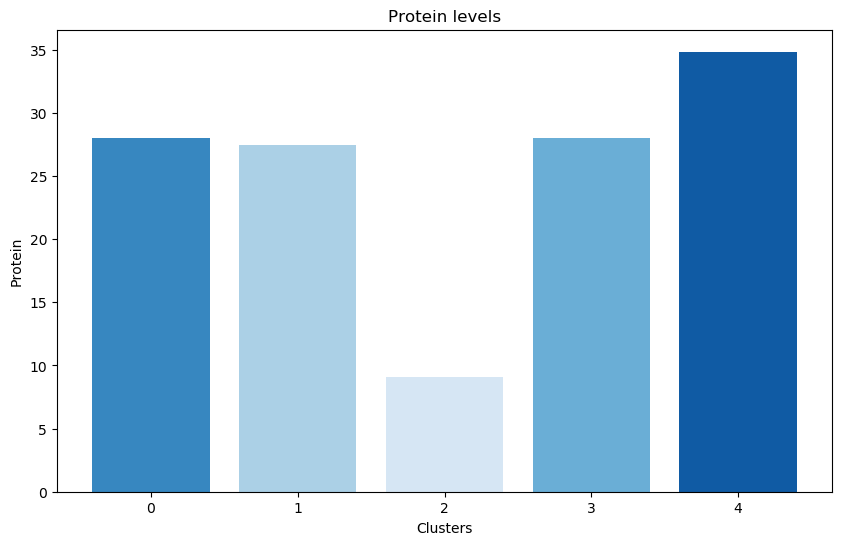

In [462]:
fig,ax = plt.subplots(1,figsize=(10,6))
ax.bar(ingr_results.index,ingr_results.protein,color=sns.color_palette("Blues",5))
ax.set(title="Protein levels",xlabel="Clusters",ylabel="Protein")
plt.savefig('protein.png', bbox_inches='tight')
plt.show()